# Explore SVD based word embedding

This notebook explores word embeddings that are based on SVD of a possibly transformed word-context matrix. Starting with the raw matrix `counts`

- possilby transform `counts` (e.g. log data, do PPMI transform, normalize rows)
- compute SVD of new matrix
- explore word embeddings e.g. scores plots, word similarity
- explore loadings

The material in this notebook is covered in chapters 15/16 of SLP3
- https://web.stanford.edu/~jurafsky/slp3/15.pdf
- https://web.stanford.edu/~jurafsky/slp3/16.pdf


## data

The github repo comes with a small data set pre computed (from a random sample of 1000 court cases). You can download larger data files from https://drive.google.com/open?id=0B40b05f-8LWtVGsybWw4OTVyV00 then place them in the data/ folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

from scipy.sparse.linalg import svds, norm
from scipy.sparse import diags, csr_matrix, dok_matrix

# import local code files
import sys, os
sys.path.append(os.getcwd() + '/code/')

# working with word embeddings
from save import load_vocabulary, load_matrix
from ppmi import calc_ppmi
from word_similarity import similarity, closest
from transform_counts import remove_zero_count_words

# exploring/visualizing scores/loadings
from scores_viz import scores_plot, filter_scores
from explore_loadings import top_loading_components, top_loading_words, top_loading_words_df

# only import this if you have plot.ly installed
# from viz_plotly import interactive_scores_plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
w2i, i2w = load_vocabulary('data/vocab_small_ex.txt')
co_counts = load_matrix('data/co_counts_small_ex')
word_counts = np.load('data/word_counts_small_ex.npy')

# uncomment this code if you have the larger data file
# w2i, i2w = load_vocabulary('data/vocab_10000.txt')
# co_counts = load_matrix('data/co_counts_10000')
# word_counts = np.load('data/word_counts_10000.npy')

In [19]:
co_counts

<44573x44573 sparse matrix of type '<type 'numpy.float64'>'
	with 12372105 stored elements in Compressed Sparse Row format>

# transform counts


In [20]:
# normalized row by row norms
co_counts_normed = diags(1.0/norm(co_counts, axis=1)) * co_counts 

In [8]:
co_counts_log = co_counts
co_counts_log.data = np.log(1 + co_counts.data)

In [9]:
ppmi = calc_ppmi(co_counts)

# SVD of counts matrix

If $X \in \mathbb{R}^{n \times d}$ is a data matrix with the n observations on rows then the rank K SVD is given by
$$X \approx U D V^T$$
where $U \in \mathbb{R}^{n \times K}$ is the matrix of normalized scores and  $V \in \mathbb{R}^{d \times K}$ is the matrix of loadings.

If X is a word-context matrix then U (or UD) gives a word embedding.

In [ ]:
%%time
k = 100

normed_scores, sing_vals, loadings = svds(co_counts_normed, k)

loadings = loadings.T
un_normed_scores = normed_scores * sing_vals

In [11]:
embedding = un_normed_scores

# Explore word embedding (scores)

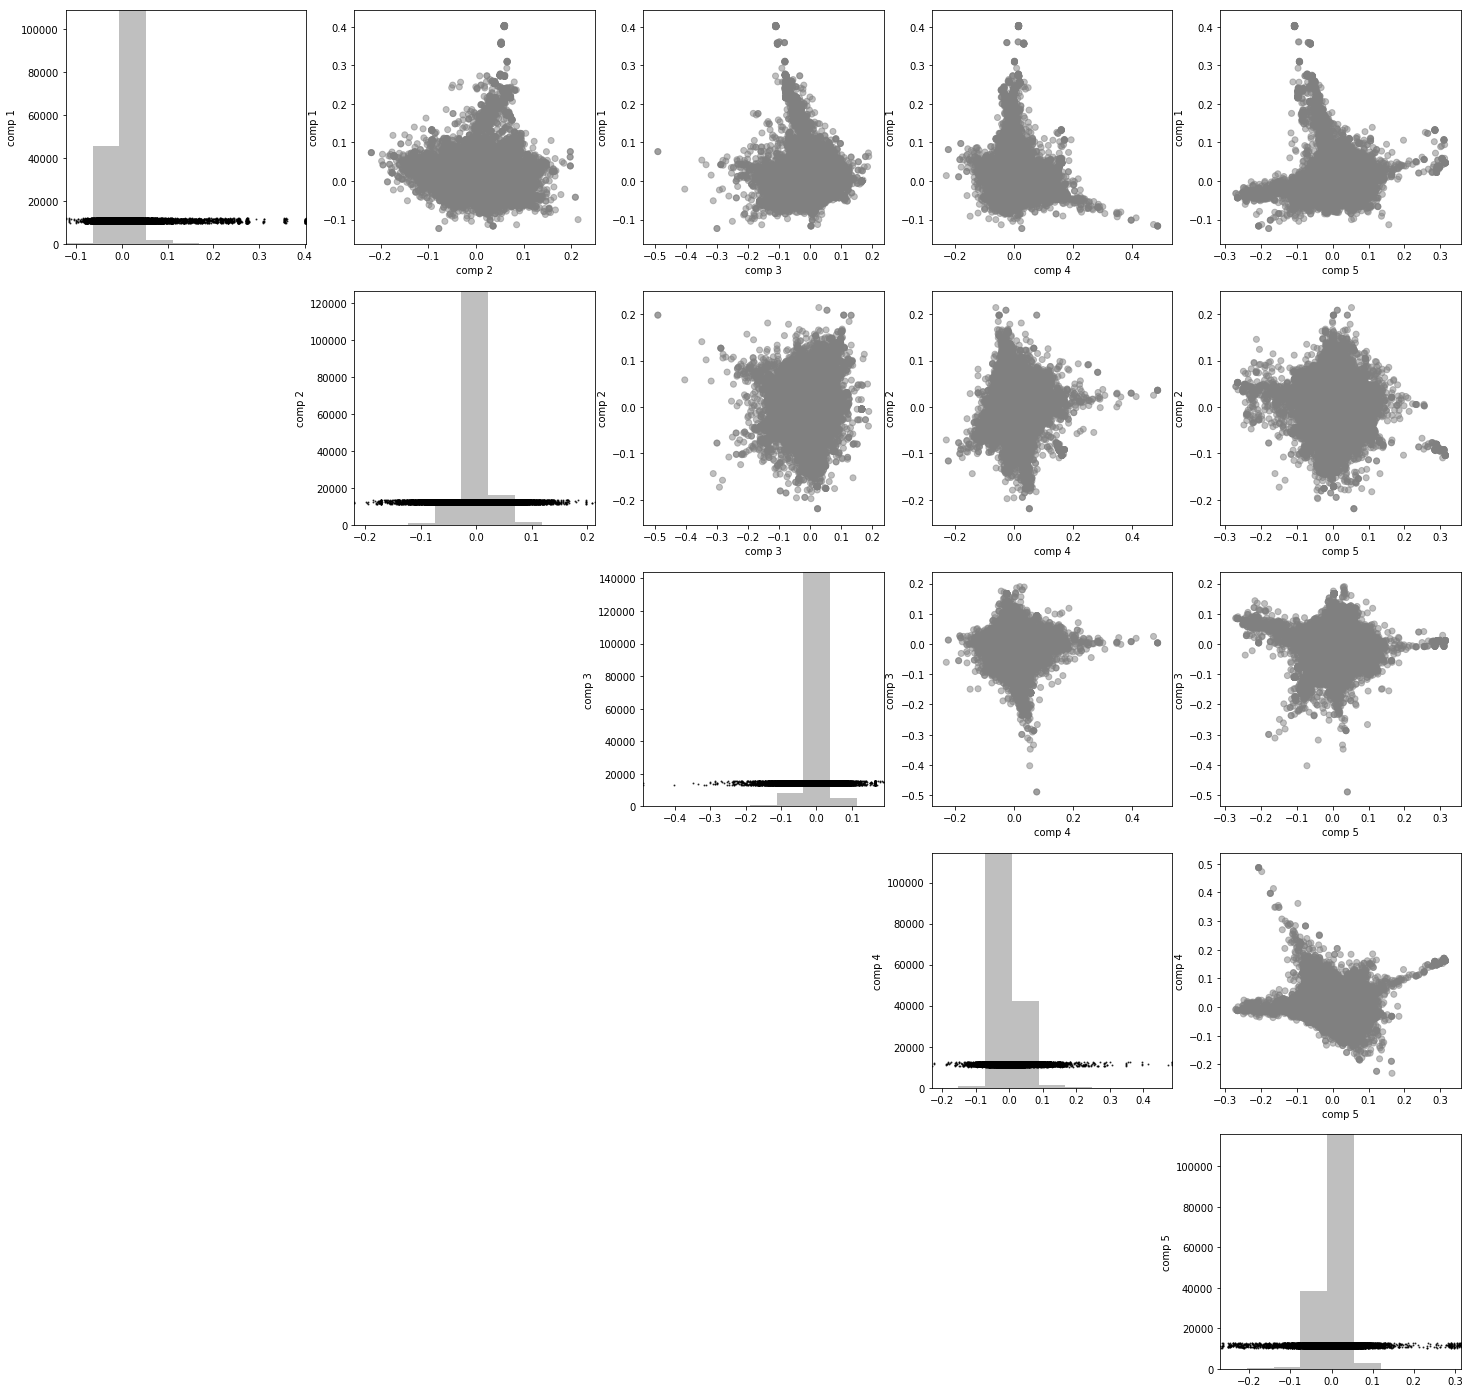

In [12]:
scores_plot(embedding,
            start=1,
            n_comp=5,
            title='',
            comp_names=None)

In [11]:
# this won't run if you don't have plot.ly already installed
# from py_fun_iain.dim_red.viz_plotly import interactive_scores_plot
# interactive_scores_plot(scores,comp1=1, comp2=3, labels=iw)

# simlarity

In [13]:
word1 = 'lawyer'
word2 = 'lawyers'

similarity(word1, word2, embedding, w2i, sim='angle')

16.431973256111348

In [14]:
word = 'lawyer'
closest(word, embedding, w2i, N=10)

['wooden',
 'dna',
 'affiliated',
 'bringing',
 'sentencers',
 'affiliates',
 'deferring',
 'controversy',
 'exemptible',
 'immunities']

# explore loadings

In [15]:
top_loading_df = top_loading_words_df(loadings, i2w, n=30)

top_loading_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,warden,district,supra,rule,justice,rule,rule,justice,4,pp,...,at,in,us,of,and,and,to,v,of,the
2,fed,f,5,they,cause,cause,they,than,supra,supra,...,id,a,v,a,a,the,the,us,states,of
3,540,stat,4,their,if,argued,if,more,5,rule,...,to,for,§,and,of,of,by,of,united,to
4,510,d,if,said,argued,brief,cause,district,justice,p,...,in,at,in,in,by,a,v,the,court,and
5,if,2d,n,company,brief,petitioner,argued,company,they,d,...,see,the,c,that,that,states,at,see,supreme,in
6,rep,supra,pp,if,rule,justice,supra,said,3,ante,...,v,to,et,states,the,for,a,supreme,the,a
7,so,ed,warden,justice,who,federal,than,department,pp,r,...,§,by,states,by,states,court,straight,at,v,that
8,f3d,opinion,stat,congress,they,supra,4,other,rule,justice,...,a,on,at,united,in,to,line,to,us,for
9,f,west,l,only,department,pp,who,criminal,2d,than,...,s,us,al,court,is,united,arc,court,to,by
10,they,they,ed,act,4,company,their,rule,r,540,...,by,§,537,supreme,united,supreme,centered,co,that,is


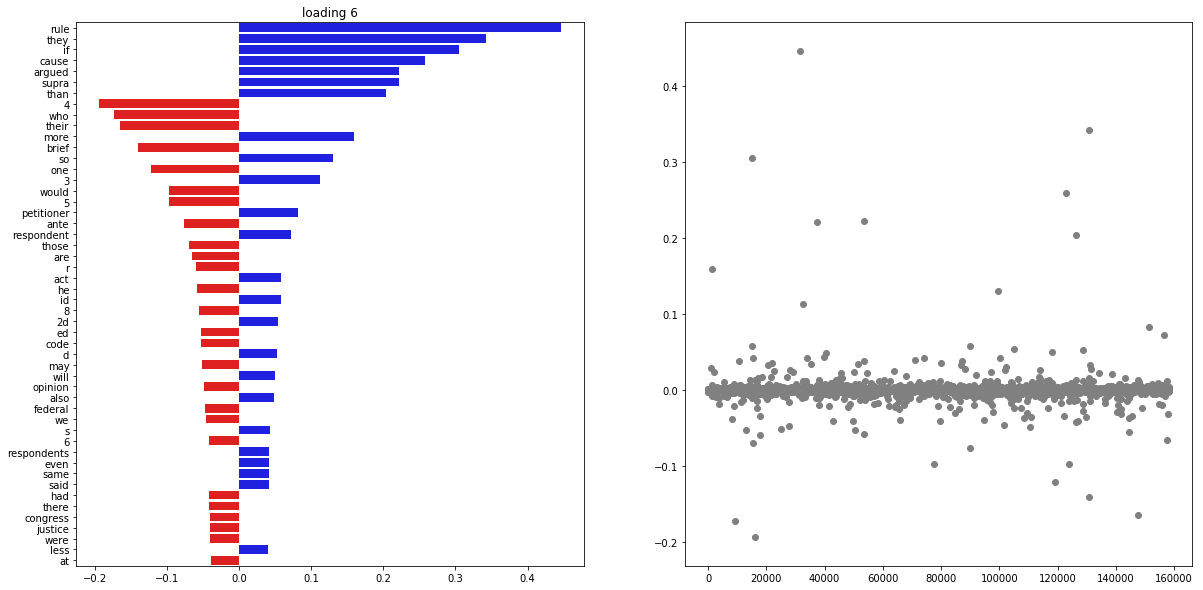

In [16]:
comp_numer = 6  # which loading
n = 50 # how many components to show

plt.figure(figsize=[20, 10])

plt.subplot(1,2,1)
top_loading_components(loadings[:, comp_numer], i2w, n, comp_numer)


plt.subplot(1,2,2)
plt.scatter(range(loadings.shape[0]), loadings[:, comp_numer], color='grey')